# Analysing if garage is important to SalesPrice of house

## Linear Regression

### Pre-process data

In [1]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
data = r'/Users/OliverPan/Desktop/house/train.csv'

In [4]:
df = pd.read_csv(data)

In [5]:
df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [6]:
garage_df = df[["Id", "SalePrice", "GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]]

In [7]:
garage_df.head()

,Id,SalePrice,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,1,208500,Attchd,2003.0,RFn,2,548,TA,TA
1,2,181500,Attchd,1976.0,RFn,2,460,TA,TA
2,3,223500,Attchd,2001.0,RFn,2,608,TA,TA
3,4,140000,Detchd,1998.0,Unf,3,642,TA,TA
4,5,250000,Attchd,2000.0,RFn,3,836,TA,TA


### Analyse Categorical Garage Variables

In [8]:
#Analysing different garage styles
garage_df["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [9]:
#Analysing different garage finish and design
garage_df["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [275]:
#Analysing the amount of cars the garage can hold
garage_df["GarageYrBlt"].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [276]:
#TA Takes up a majority, so it would be best to temporarily drop this column
garage_df["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [277]:
#TA Takes up a majority, so it would be best to temporarily drop this column
garage_df["GarageCond"].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

#### Analyse GarageCars since highest correlation

In [10]:
#Analysing the amount of cars the garage can hold
garage_df["GarageCars"].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

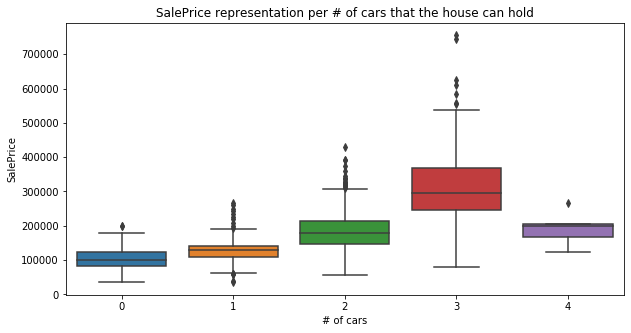

In [17]:
#Create visualization for SalePrice to GarageCars (From below, correlation is higher than other variables)
plt.figure(figsize = (10, 5))
sns.boxplot(x = garage_df["GarageCars"], y = garage_df["SalePrice"])

plt.title("SalePrice representation per # of cars that the house can hold")
plt.xlabel("# of cars")
plt.ylabel("SalePrice")

plt.show()

##### As the data suggests, the more cars a garage can hold, the higher the SalePrice.
##### Four garages do not seem like they indicate higher SalePrice, which may skew the data. We may need to change that later

In [278]:
#Drop columns
garage_df = garage_df.drop(["GarageQual", "GarageCond"], axis = 1)

In [279]:
garage_df.describe()

,Id,SalePrice,GarageYrBlt,GarageCars,GarageArea
count,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000
mean,730.500000,180921.195890,1978.506164,1.767123,472.980137
std,421.610009,79442.502883,24.689725,0.747315,213.804841
min,1.000000,34900.000000,1900.000000,0.000000,0.000000
25%,365.750000,129975.000000,1961.000000,1.000000,334.500000
50%,730.500000,163000.000000,1980.000000,2.000000,480.000000
75%,1095.250000,214000.000000,2002.000000,2.000000,576.000000
max,1460.000000,755000.000000,2010.000000,4.000000,1418.000000


In [280]:
#Dataframe going into model
garage_df = garage_df.drop(["Id"], axis = 1)
garage_df.head()

,SalePrice,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea
0,208500,Attchd,2003.0,RFn,2,548
1,181500,Attchd,1976.0,RFn,2,460
2,223500,Attchd,2001.0,RFn,2,608
3,140000,Detchd,1998.0,Unf,3,642
4,250000,Attchd,2000.0,RFn,3,836


### Encode Categorial Variables

In [228]:
garage_df["GarageType"] = garage_df["GarageType"].astype("category").cat.codes
garage_df["GarageFinish"] = garage_df["GarageFinish"].astype("category").cat.codes

In [229]:
garage_df = garage_df.dropna()

### Last look at correlation before model

In [230]:
garage_df.corr()["SalePrice"]

SalePrice       1.000000
GarageType     -0.358279
GarageYrBlt     0.486362
GarageFinish   -0.513105
GarageCars      0.637095
GarageArea      0.608405
Name: SalePrice, dtype: float64

##### The number of cars that a house can hold is postively correlated to SalePrice, which is quite intuitive

### Linear Regression 

##### I am going to test and train on train.csv, to start

In [231]:
X = garage_df.drop(["SalePrice"], axis = 1)
y = garage_df[["SalePrice"]]

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [233]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [234]:
print(regressor.intercept_)

#Shows coef per variable
print(regressor.coef_)

[37368.20283462]
[[-3.87480409e+03  2.85183169e+01 -2.32850606e+04  3.78909003e+04
   1.13124059e+02]]


In [235]:
y_pred = regressor.predict(X_test)

In [236]:
#Results using regressor
df = pd.DataFrame({'Actual': y_test["SalePrice"].to_list(), 'Predicted': list(y_pred.flatten())})
df.head()

,Actual,Predicted
0,108480,102317.452078
1,105000,107318.004864
2,190000,202779.098348
3,176500,187444.087777
4,255000,278941.093167


In [237]:
## Error is very high, so we need to tune the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

Mean Absolute Error: 35521.98942338484


### Linear Regression with only three categorical values

In [238]:
garage_df = garage_df.drop(["GarageYrBlt", "GarageArea"], axis = 1)

In [240]:
X = garage_df.drop(["SalePrice"], axis = 1)
y = garage_df[["SalePrice"]]

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [242]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [243]:
#Shows coef per variable
print(regressor.coef_)

[[ -4128.82302201 -23336.47462015  66171.91146002]]


In [244]:
y_pred = regressor.predict(X_test)

In [245]:
#Results using regressor
df = pd.DataFrame({'Actual': y_test["SalePrice"].to_list(), 'Predicted': list(y_pred.flatten())})
df.head(10)

,Actual,Predicted
0,108480,97033.532585
1,105000,113548.824673
2,190000,203057.210753
3,176500,179720.736133
4,255000,269229.122213
5,190000,160221.773914
6,262500,203057.210753
7,311500,179720.736133
8,170000,194799.564709
9,119000,97033.532585


In [246]:
## The Error is still very high, so we can try other modelsl
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

Mean Absolute Error: 37007.91236693262


In [247]:
#### A reason that Linear Regression may not be the best indicator is due to the Linear Regression Assumptions